This project is about Airlines Passenger and Freight data from 2015 to 2017. This dataset contains information of airlines operating in India between 2015 to 2017 for each month. This data set is sourced from Data World website, URL:https://data.world/rajanand/international-air-traffic-from-and-to-india
This dataset has 9 columns, 2334 rows and 131 KB of data.

Hypothesis:
1)No of people leaving from India is more than people coming to India.
2)Most of the people do air travel during Q2 and Q4.
3)AIR INDIA Airline is the competitor for international airlines in regards to passenger and freight.
4)Finding best performing Airline in all quarters in terms of growth.


In [7]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [8]:
#Loading csv file
def load_airline_data(file_path):
    """
    Load the airline data from a CSV file.

    Parameters:
    - file_path (str): The file path to the CSV file.

    Returns:
    - DataFrame or None: The loaded DataFrame if successful, None otherwise.
    """
    try:
        # Attempt to load the CSV file
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        # Handle the case where the file is not found
        print("Error: File not found.")
        return None
    except Exception as e:
        # Handle any other unexpected errors
        print(f"An error occurred: {str(e)}")
        return None

file_path = 'Airlinewise Monthly International Air Traffic To And From The Indian Territory.csv'
df = load_airline_data(file_path)
if df is not None:
    print("Data loaded successfully!")
    # Perform further processing or analysis on the loaded data
else:
    print("Failed to load data. Please check the file path and try again.")


Data loaded successfully!


In [9]:
#Displaying dataframe
df.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680


In [10]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   2334 non-null   int64  
 1   MONTH                  2334 non-null   object 
 2   QUARTER                2334 non-null   object 
 3   AIRLINE NAME           2334 non-null   object 
 4   CARRIER TYPE           2334 non-null   object 
 5   PASSENGERS TO INDIA    2333 non-null   float64
 6   PASSENGERS FROM INDIA  2334 non-null   int64  
 7   FREIGHT TO INDIA       2334 non-null   float64
 8   FREIGHT FROM INDIA     2334 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 164.2+ KB


In [11]:
#Finding Null values in dataframe
df.isnull().sum()

YEAR                     0
MONTH                    0
QUARTER                  0
AIRLINE NAME             0
CARRIER TYPE             0
PASSENGERS TO INDIA      1
PASSENGERS FROM INDIA    0
FREIGHT TO INDIA         0
FREIGHT FROM INDIA       0
dtype: int64

In [12]:
#Filling null values with zero. Since Passengers to India column holds the count of passengers. Assuming zero for null. 
df.fillna(0, inplace=True)

In [13]:
#Checking for null values.
df.isnull().sum()

YEAR                     0
MONTH                    0
QUARTER                  0
AIRLINE NAME             0
CARRIER TYPE             0
PASSENGERS TO INDIA      0
PASSENGERS FROM INDIA    0
FREIGHT TO INDIA         0
FREIGHT FROM INDIA       0
dtype: int64

In [14]:
#List of columns in the dataset
df.columns.tolist()

['YEAR',
 'MONTH',
 'QUARTER',
 'AIRLINE NAME',
 'CARRIER TYPE',
 'PASSENGERS TO INDIA',
 'PASSENGERS FROM INDIA',
 'FREIGHT TO INDIA',
 'FREIGHT FROM INDIA']

In [15]:
#Dropping unused columns from dataframe. Since Month and Carrier type columns are not used in analysis.
df.drop(columns=['MONTH', 'CARRIER TYPE'], axis=1, inplace=True)

In [16]:
#Overall picture of dataframe
df.describe()

,YEAR,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
count,2334.000000,2334.000000,2334.000000,2334.000000,2334.000000
mean,2015.699229,24465.995287,25452.484576,550.932764,865.262860
std,0.674328,51137.760821,52474.422940,1281.898272,2151.224952
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,1483.500000,1629.250000,0.300000,8.525000
50%,2016.000000,4954.500000,5264.500000,53.950000,154.325000
75%,2016.000000,23284.000000,23418.500000,311.214750,770.028000
max,2017.000000,402497.000000,400155.000000,14916.471000,48640.298000


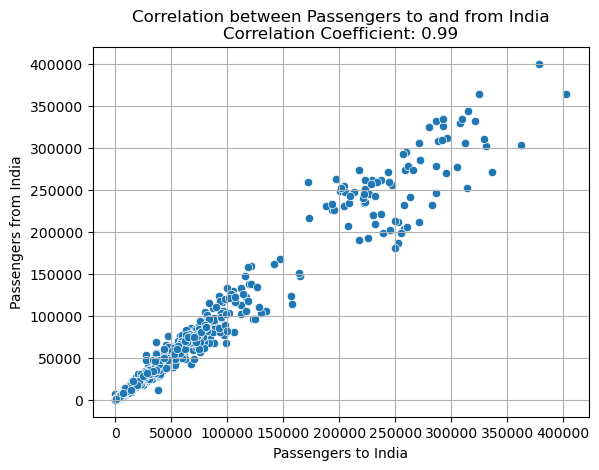

In [17]:
#Finding the correlation between Passengers to India and Passengers from India
# Calculate the correlation coefficient
correlation = df['PASSENGERS TO INDIA'].corr(df['PASSENGERS FROM INDIA'])
# Create a scatter plot
sns.scatterplot(x=df['PASSENGERS TO INDIA'], y=df['PASSENGERS FROM INDIA'])
plt.xlabel('Passengers to India')
plt.ylabel('Passengers from India')
plt.title('Correlation between Passengers to and from India\nCorrelation Coefficient: {:.2f}'.format(correlation))
plt.grid(True)
plt.show()


The correlation between Passengers to India and Passengers from India is 0.99. The correlation is positive, hence there is a linear and strong relation between Passengers to India and Passengers from India. 

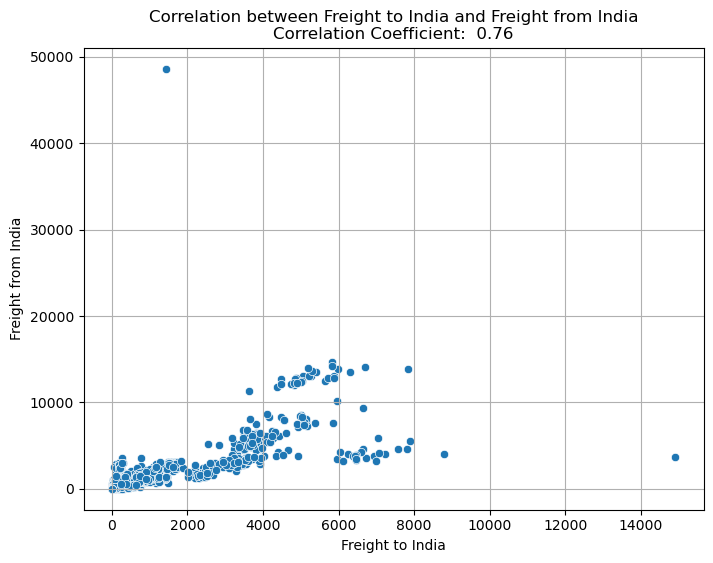

In [18]:
#Finding the correlation between Freight to India and Freight from India.
freight_to_india = df['FREIGHT TO INDIA']
freight_from_india = df['FREIGHT FROM INDIA']
correlation = freight_to_india.corr(freight_from_india)
# Plotting the correlation graph
plt.figure(figsize=(8, 6))
sns.scatterplot(x=freight_to_india, y=freight_from_india)
plt.title('Correlation between Freight to India and Freight from India\nCorrelation Coefficient:  {:.2f}'.format(correlation))
plt.xlabel('Freight to India')
plt.ylabel('Freight from India')
plt.grid(True)
plt.show()

This Correlation between Freight to India and Freight from India is 0.76. Since the correlation is positive, there is a linear realtion between Freight to India and Freight from India.

In [19]:
#Hypothesis:1 No of people leaving from India is more than people coming to India.
People_Count=df[['YEAR','PASSENGERS TO INDIA','PASSENGERS FROM INDIA']]
#Grouping the dataframe based on YEAR, Summing Passengers to India and Passengers from India
People_Sum=People_Count.groupby('YEAR').sum(['PASSENGERS TO INDIA','PASSENGERS FROM INDIA'])
# Reset the index to convert MultiIndex to regular index
People_Sum=People_Sum.reset_index()
People_Sum

,YEAR,PASSENGERS TO INDIA,PASSENGERS FROM INDIA
0,2015,23781640.0,24858956
1,2016,26543689.0,27122472
2,2017,6778304.0,7424671


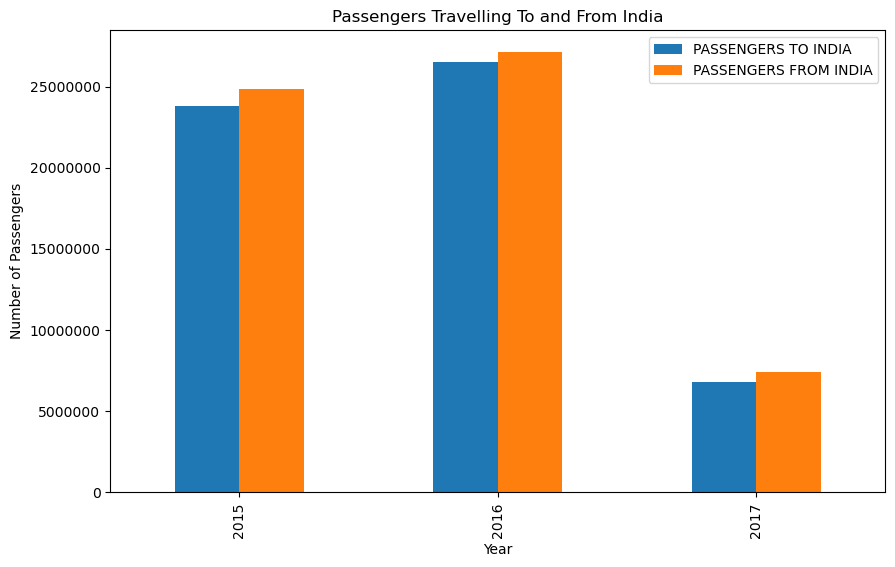

In [20]:
#Plotting the no.of passengers travelling to and from India for each year
People_Sum.plot.bar('YEAR',figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Passengers Travelling To and From India')
plt.ylim(ymin=0)
# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

The above graph shows number of passengers travelling for each year. For each year, people leaving India are more than people coming to India. And no. of passengers travelling each year has increased. In the year 2017, the current dataset has data for only first quarter, there is a decrease in size of bar graph during that year.

People leaving from India are more than coming to India


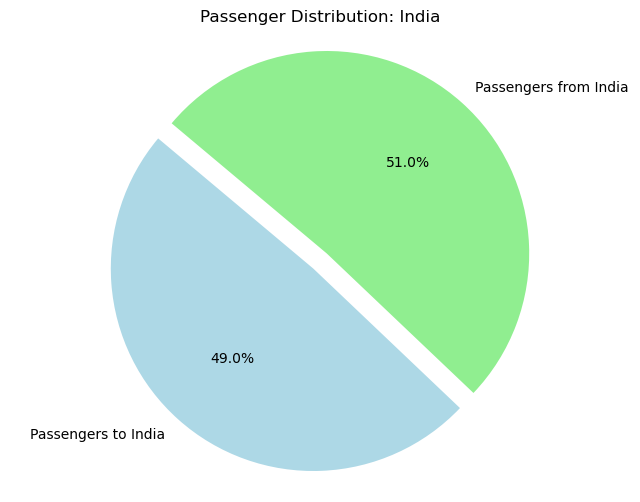

In [21]:
#Testing Hypothesis 1
if People_Sum['PASSENGERS TO INDIA'].sum()>People_Sum['PASSENGERS FROM INDIA'].sum():
    print('People coming to India are more than leaving from India')
else:
    print('People leaving from India are more than coming to India')
# Calculate total passengers to India and from India
total_passengers_to_india = People_Sum['PASSENGERS TO INDIA'].sum()
total_passengers_from_india =People_Sum['PASSENGERS FROM INDIA'].sum()

# Plotting
labels = ['Passengers to India', 'Passengers from India']
sizes = [total_passengers_to_india, total_passengers_from_india]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # explode the 1st slice (Passengers to India)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Passenger Distribution: India')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The Null Hypothesis is true, that No. of people leaving India is more than No. of people coming to India. But the difference is not much between passengers to India and Passengers from India. 

In [22]:
#Hypothesis :2 Most of the people do air travel during Q2 and Q4.
People_count_per_quarter=df[['YEAR','QUARTER','PASSENGERS TO INDIA','PASSENGERS FROM INDIA']]
#Grouping the dataframe for each year and each quarter.Summing passengers to India and Passengers from India 
Quarter_Sum=People_count_per_quarter.groupby(['YEAR','QUARTER']).sum(['PASSENGERS TO INDIA','PASSENGERS FROM INDIA'])


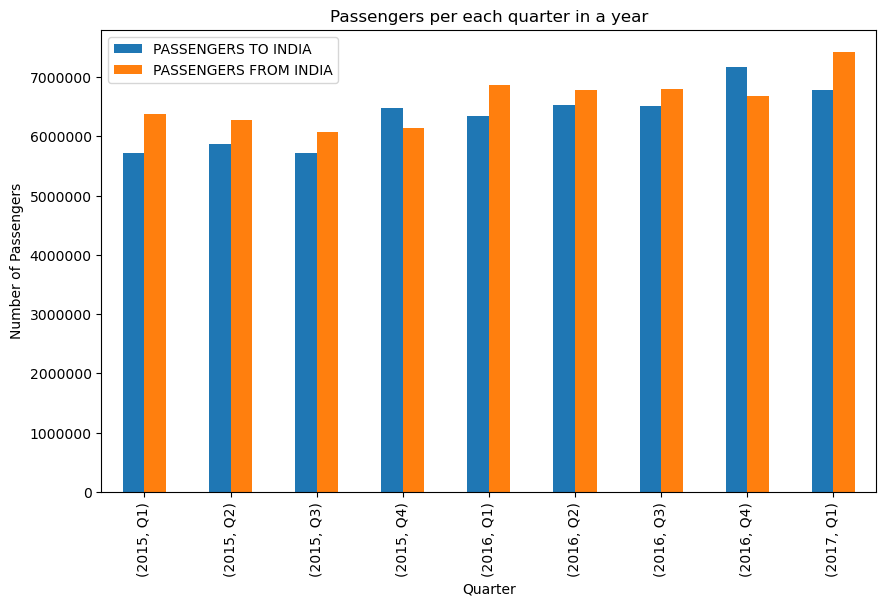

In [23]:
#Supporting graph for Hypothesis 2
#Plotting no. of passengers tarvelling per each quarter.
Quarter_Sum.plot.bar(figsize=(10,6))
plt.xlabel('Quarter')
plt.ylabel('Number of Passengers')
plt.title('Passengers per each quarter in a year')
#Setting y axis reference to zero.
plt.ylim(ymin=0)
# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

Observations from above Graph:No. of people doing air travel has been increasing across all Quarters.
During Q1 of each year, people travelling from India are significantly more than people travelling to India.
During Q4 of each year, people travelling to India is more than people travelling from India. Hence, people travel to India during Q4 of each year and leave India during Q1 of the year.

In [24]:
#The data for 2017 year is not present for all quarters in dataset 
#Since the next processing steps are comparing data between quarters.
#Dropping 2017 Q1 data from dataframe for equal comparision of quarters, 
Quarter_Sum=Quarter_Sum.drop(Quarter_Sum.index[-1])
Quarter_Sum

PASSENGERS TO INDIA  PASSENGERS FROM INDIA
YEAR QUARTER                                            
2015 Q1                 5712230.0                6376365
     Q2                 5876964.0                6276379
     Q3                 5711102.0                6064483
     Q4                 6481344.0                6141729
2016 Q1                 6343530.0                6871288
     Q2                 6521248.0                6775745
     Q3                 6515859.0                6802518
     Q4                 7163052.0                6672921

In [25]:
#Summing the passengers for each quarter
Quarter_Group=Quarter_Sum.groupby('QUARTER').sum(['PASSENGERS TO INDIA','PASSENGERS FROM INDIA'])
# Reset the index to convert MultiIndex to regular index
Quarter_Group=Quarter_Group.reset_index()
Quarter_Group

,QUARTER,PASSENGERS TO INDIA,PASSENGERS FROM INDIA
0,Q1,12055760.0,13247653
1,Q2,12398212.0,13052124
2,Q3,12226961.0,12867001
3,Q4,13644396.0,12814650


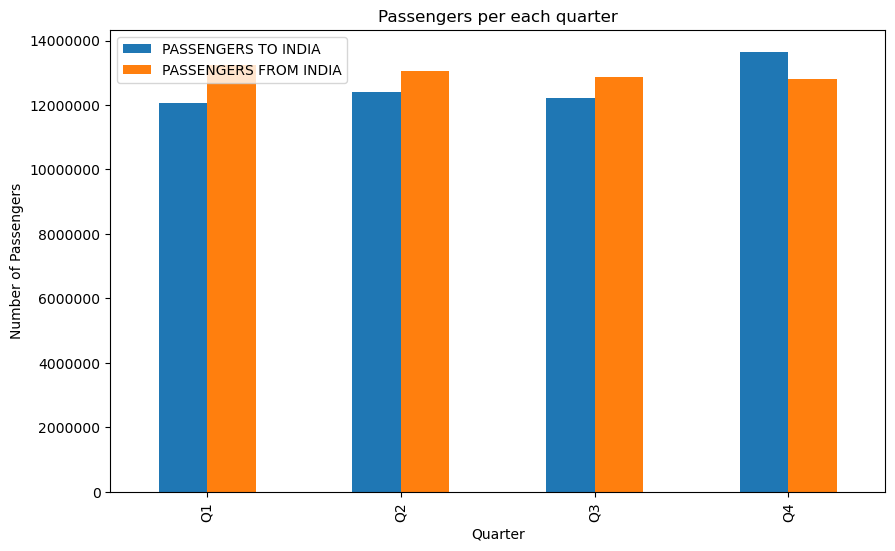

In [26]:
#Supporting graph for Hypothesis 2
#Plotting no. of passengers for each quarter
Quarter_Group.plot.bar('QUARTER',figsize=(10, 6))  # Set the figure size here
plt.xlabel('Quarter')
plt.ylabel('Number of Passengers')
plt.title('Passengers per each quarter')
#Setting y axis to zero reference
plt.ylim(ymin=0)
# Disable scientific notation on y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

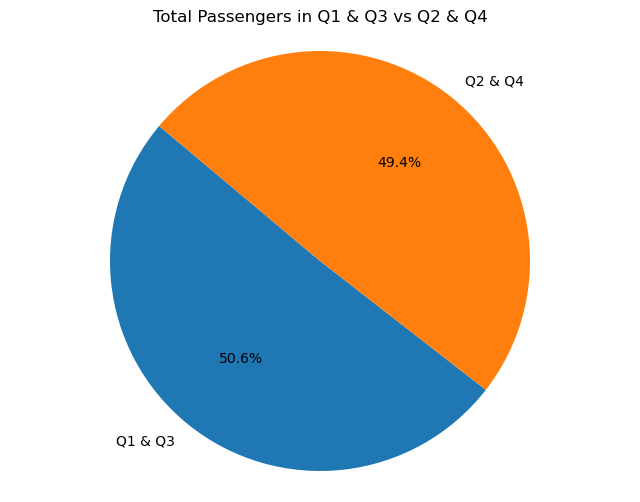

In [27]:
#Testing Hypothesis 2
# Calculate total passengers in each quarter
Quarter_Group['Total Passengers'] = [sum(row[1:]) for row in zip(Quarter_Group['PASSENGERS TO INDIA'], Quarter_Group['PASSENGERS FROM INDIA'])]
# Sum Q1 & Q3 and Q2 & Q4
sums = [sum(Quarter_Group['Total Passengers'][:2]), sum(Quarter_Group['Total Passengers'][2:])]
# Plotting total passengers travelling in Q1&Q3 vs Q2&Q4.
plt.figure(figsize=(8, 6))
plt.pie(sums, labels=['Q1 & Q3', 'Q2 & Q4'], autopct='%1.1f%%', startangle=140)
plt.title('Total Passengers in Q1 & Q3 vs Q2 & Q4')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The Null Hypothesis is False, People travelling in Q1&Q3 are more than Q2&Q4. But the difference is not much between the quarters. 

In [28]:
#Hypothesis :3 AIR INDIA Airline is the competitor for international airlines in regards to passenger and freight.
Airlinewise_Passengers=df.groupby(['AIRLINE NAME']).sum(['PASSENGER TO INDIA','PASSENGER FROM INDIA','FREIGHT TO INDIA','FREIGHT FROM INDIA'])
Airlinewise_Passengers

,YEAR,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA
AIRLINE NAME,,,,,
AEROFLOT,54423,194356.0,210052,526.952,5425.072
AEROLOGIC,54423,0.0,0,71.486,549.440
AIR ARABIA,54423,1964928.0,2031394,2996.604,29382.071
AIR ASIA BERHAD,54423,735850.0,717993,1412.979,8481.998
AIR ASIA X,30243,66188.0,69238,2302.500,2863.400
...,...,...,...,...,...
UNITED PARCEL SERVICES,54423,0.0,0,12311.212,10868.009
US BANGLA AIRLINES,6051,8882.0,8808,0.000,0.000
UZBEKISTAN AIRWAYS,54423,114183.0,115269,9981.627,15737.275


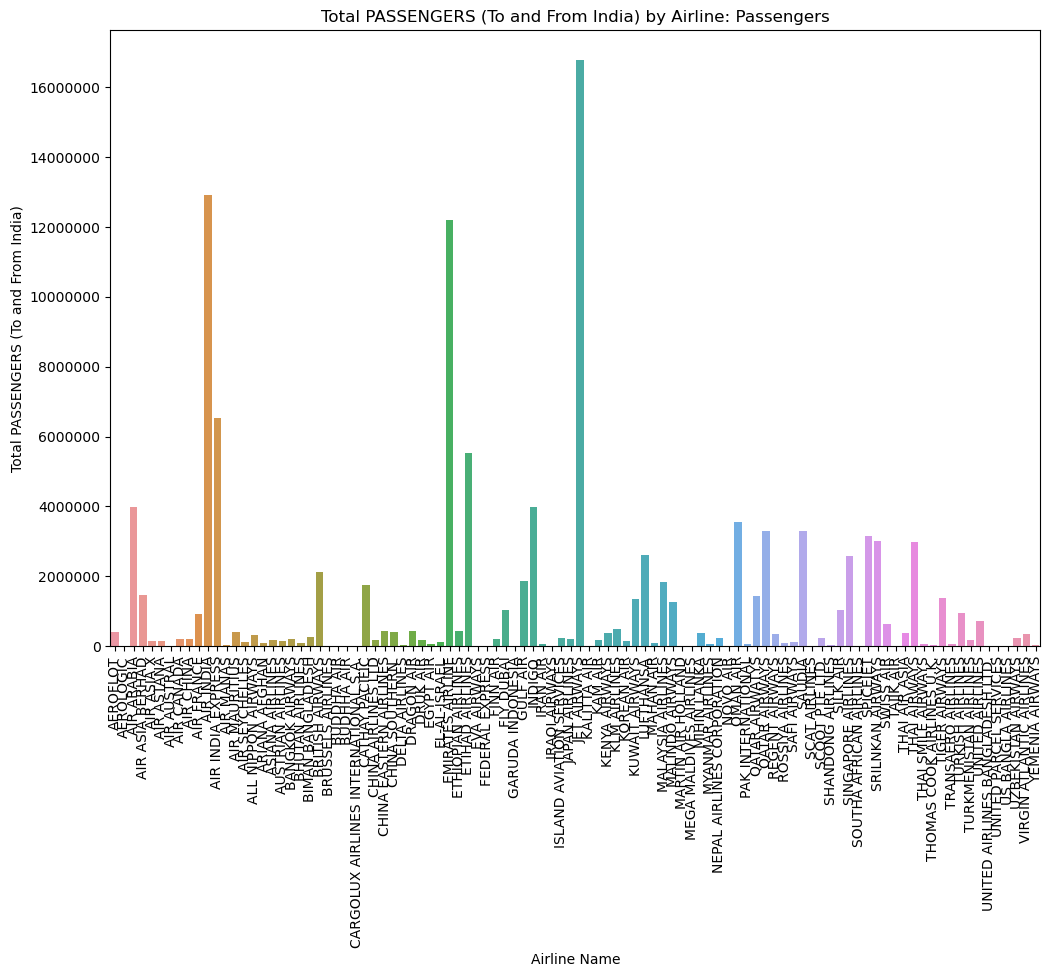

In [29]:
def plot_total_metric_by_airline(df, metric_column, plot_title):
    """
    Plot the total metric (passengers or freight) for each airline.

    Parameters:
    - df (DataFrame): The DataFrame containing airline data.
    - metric_column (str): The name of the column representing the metric.
    - plot_title (str): The title of the plot.

    Returns:
    - None
    """
    # Sum the metric for each airline
    df['Total ' + metric_column] = df[metric_column + ' TO INDIA'] + df[metric_column + ' FROM INDIA']

    # Reset the index to convert MultiIndex to regular index
    df_reset = df.reset_index()

    # Create the bar plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df_reset, x='AIRLINE NAME', y='Total ' + metric_column)
    plt.xticks(rotation=90)
    plt.xlabel('Airline Name')
    plt.ylabel('Total ' + metric_column + ' (To and From India)')
    plt.title('Total ' + metric_column + ' (To and From India) by Airline: ' + plot_title)
    # Ensure y-axis starts from zero
    plt.ylim(ymin=0)
    # Disable scientific notation on y-axis
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()


# Plot total passengers for each airline
plot_total_metric_by_airline(Airlinewise_Passengers.copy(), 'PASSENGERS', 'Passengers')


The above graph shows that JET AIRWAYS is the top among the airlines carrying passengers.AIR INDIA and EMIRATES AIRLINES stands 2nd and 3rd position respectively. 

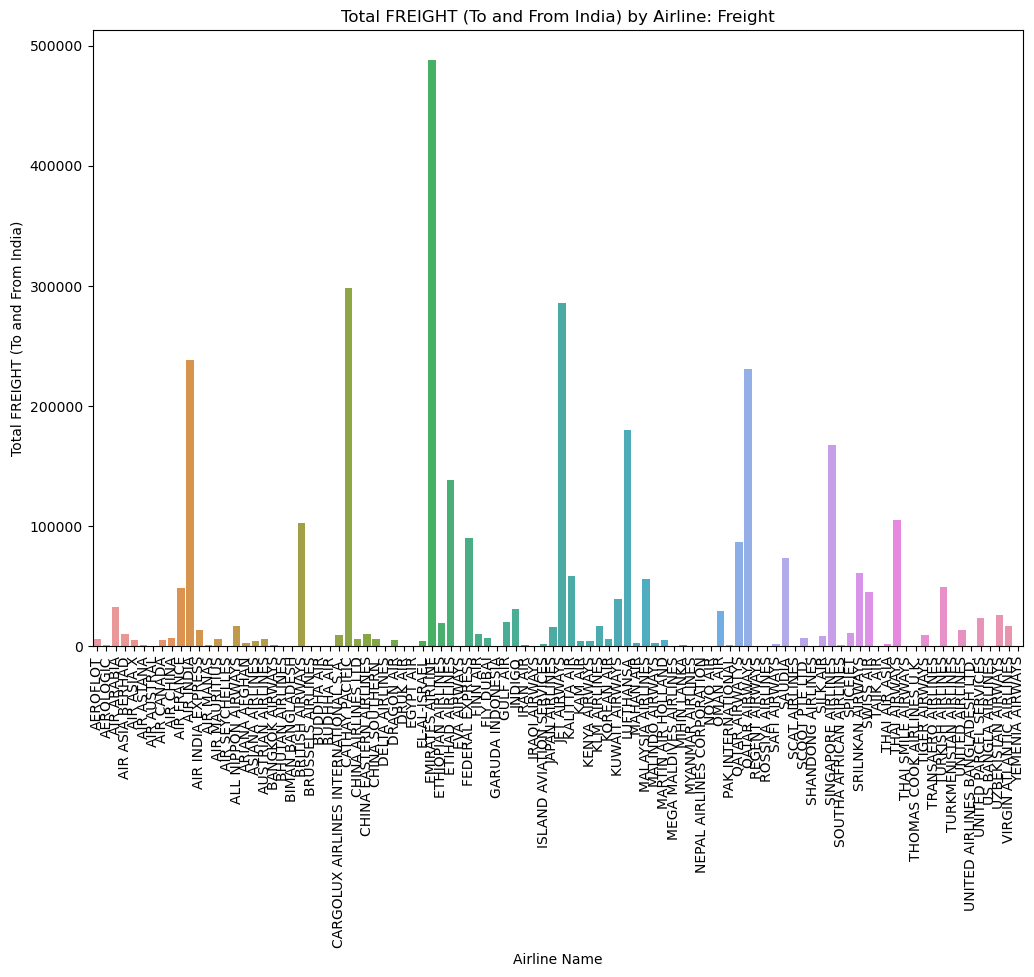

In [30]:

# Plot total freight for each airline
plot_total_metric_by_airline(Airlinewise_Passengers.copy(), 'FREIGHT', 'Freight')


The above graph shows EMIRATES AIRLINES is top among airlines in carrying freight. CATHAY PACIFIC and JET AIRWAYS stands in 2nd and 3rd position respectively.

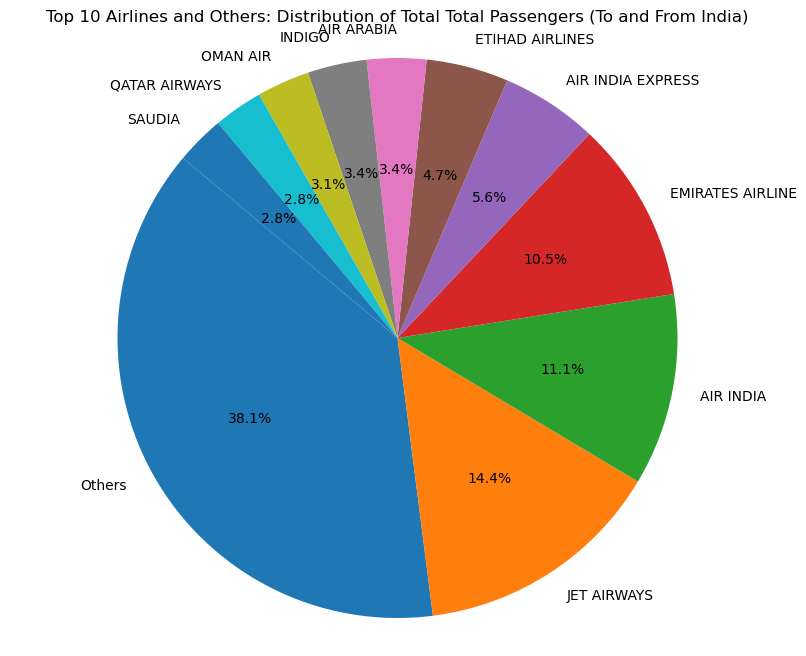

In [31]:
def plot_airline_distribution(df, metric_column, top_n):
    """
    Plot the distribution of total passengers or freight by airline during 2015 to 2017.

    Parameters:
    - df (DataFrame): The DataFrame containing airline data.
    - metric_column (str): The name of the column representing the metric (either 'Total Passengers' or 'Total Freight').
    - top_n (int): The number of top airlines to consider.

    Returns:
    - None
    """
    # Calculate the total metric for each airline
    df[metric_column] = df['PASSENGERS TO INDIA'] + df['PASSENGERS FROM INDIA'] if metric_column == 'Total Passengers' else df['FREIGHT TO INDIA'] + df['FREIGHT FROM INDIA']

    # Sort the DataFrame by the total metric in descending order
    df_sorted = df.sort_values(by=metric_column, ascending=False)

    # Select the top airlines and group the rest into "Others"
    top_airlines = df_sorted.head(top_n)
    others = df_sorted.iloc[top_n:]
    others_combined = pd.DataFrame(data={'AIRLINE NAME': ['Others'], metric_column: [others[metric_column].sum()]})

    # Concatenate top airlines and "Others"
    top_and_others = pd.concat([others_combined, top_airlines.reset_index()], ignore_index=True)

    # Create a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(top_and_others[metric_column], labels=top_and_others['AIRLINE NAME'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  
    plt.title(f'Top {top_n} Airlines and Others: Distribution of Total {metric_column} (To and From India)')
    plt.show()

# Example usage:
# Plot distribution of total passengers
plot_airline_distribution(Airlinewise_Passengers.copy(), 'Total Passengers', 10)


The Null Hypothesis is True, AIR INDIA is in 2nd position of market share in Passengers. Hence AIR INDIA is the competitor for other Airlines in terms of passengers.

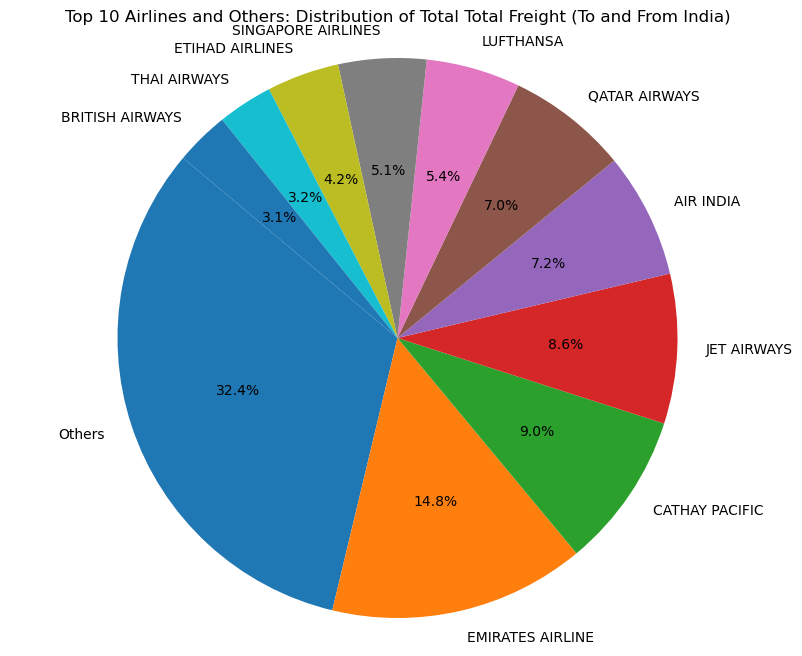

In [32]:
# Plot distribution of total freight
plot_airline_distribution(Airlinewise_Passengers.copy(), 'Total Freight', 10)


Comparing all the four graphs, It is evident that AIR India stayed among the top performers in both freight and Passengers.
Hence, we can say AIR India is a competitor for all other airlines.

In [33]:
#Hypothesis 4: Finding best performing Airline in all quarters in terms of growth.
performance_grouping=df.groupby(['YEAR','QUARTER','AIRLINE NAME']).sum([['PASSENGERS TO INDIA','PASSENGERS FROM INDIA','FREIGHT TO INDIA','FREIGHT FROM INDIA']])
# Calculate the total passengers for each airline
performance_grouping['Total Passengers'] = performance_grouping['PASSENGERS TO INDIA'] + performance_grouping['PASSENGERS FROM INDIA']
#Sum the Freight to India and Freight from India for each airline
performance_grouping['Total Freight'] = performance_grouping['FREIGHT TO INDIA'] + performance_grouping['FREIGHT FROM INDIA']

performance_grouping = performance_grouping.reset_index()
performance_grouping.head(20)

,YEAR,QUARTER,AIRLINE NAME,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,Total Passengers,Total Freight
0,2015,Q1,AEROFLOT,15213.0,19039,47.330,937.696,34252.0,985.026
1,2015,Q1,AEROLOGIC,0.0,0,5.313,4.700,0.0,10.013
2,2015,Q1,AIR ARABIA,211138.0,228547,489.736,3240.111,439685.0,3729.847
3,2015,Q1,AIR ASIA BERHAD,67830.0,70987,114.667,995.554,138817.0,1110.221
4,2015,Q1,AIR ASTANA,6582.0,8318,5.744,84.541,14900.0,90.285
5,2015,Q1,AIR AUSTRAL,0.0,0,0.000,0.000,0.0,0.000
6,2015,Q1,AIR CHINA,9868.0,12419,485.985,460.555,22287.0,946.540
7,2015,Q1,AIR FRANCE,53395.0,61867,2300.568,3860.034,115262.0,6160.602
8,2015,Q1,AIR INDIA,709825.0,770265,10292.202,14117.027,1480090.0,24409.229
9,2015,Q1,AIR INDIA EXPRESS,263463.0,330702,0.000,0.000,594165.0,0.000


In [34]:
# Sort the DataFrame by 'AIRLINE NAME', 'YEAR', and 'QUARTER'
performance_grouping = performance_grouping.sort_values(by=['AIRLINE NAME', 'YEAR', 'QUARTER'])

# Calculate passenger growth within each group
performance_grouping['passenger_growth'] = performance_grouping.groupby('AIRLINE NAME')['Total Passengers'].pct_change() * 100

# Calculate passenger growth within each group
performance_grouping['freight_growth'] = performance_grouping.groupby('AIRLINE NAME')['Total Freight'].pct_change() * 100
#Creating a separate dataframe for feight performance airlines
passenger_performance_grouping=performance_grouping
# Drop NaN values resulting from the first period, as there is no earlier period for comparison
passenger_performance_grouping['passenger_growth'] = passenger_performance_grouping['passenger_growth'].dropna()
#Creating a separate dataframe for passenger performance airlines
freight_performance_grouping=performance_grouping
# Drop NaN values resulting from the first period, as there is no earlier period for comparison
freight_performance_grouping['freight_growth'] = freight_performance_grouping['freight_growth'].dropna()


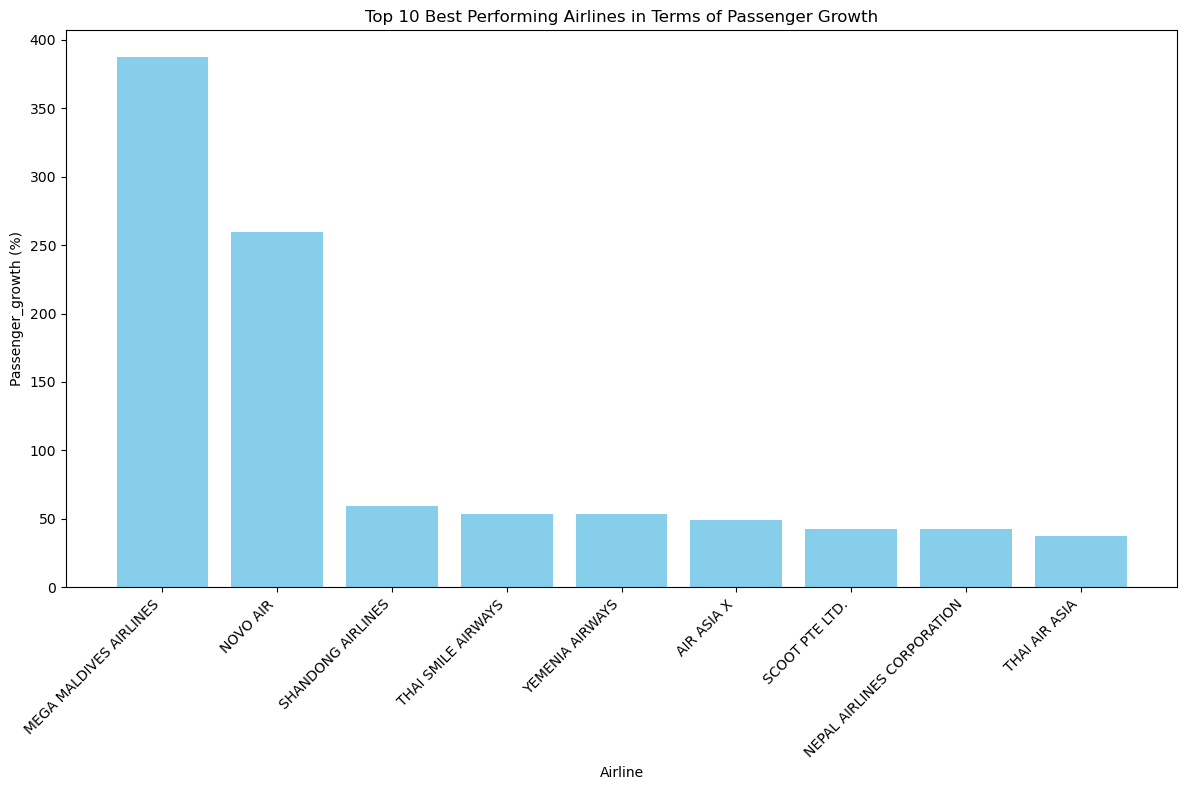

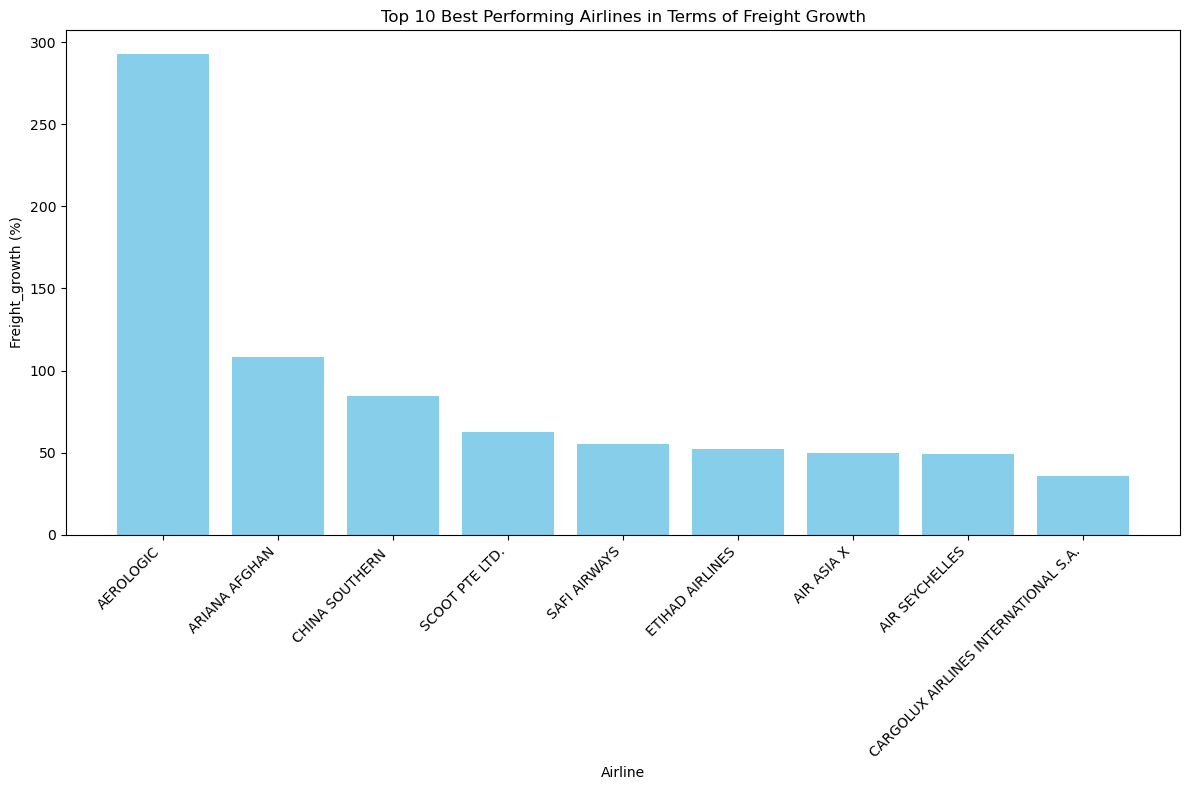

In [35]:
def plot_top_performers(df, growth_column, plot_title):
    """
    Plot the top performing airlines based on a growth metric.

    Parameters:
    - df (DataFrame): The DataFrame containing airline performance data.
    - growth_column (str): The name of the column representing the growth metric.
    - plot_title (str): The title of the plot.

    Returns:
    - None
    """
    # Group the DataFrame by airline name and calculate the mean of growth_column
    sorted_df = df.groupby('AIRLINE NAME')[growth_column].mean().sort_values(ascending=False)
    
    # Select the top 10 performers
    top_performers = sorted_df.head(10).reset_index()
    
    # Plot the bar graph for top performers
    plt.figure(figsize=(12, 8))
    plt.bar(top_performers['AIRLINE NAME'], top_performers[growth_column], color='skyblue')
    plt.title(plot_title)
    plt.xlabel('Airline')
    plt.ylabel('{} (%)'.format(growth_column.capitalize()))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Call the function to plot both bar graphs
plot_top_performers(passenger_performance_grouping, 'passenger_growth', 'Top 10 Best Performing Airlines in Terms of Passenger Growth')
plot_top_performers(freight_performance_grouping, 'freight_growth', 'Top 10 Best Performing Airlines in Terms of Freight Growth')


Above graph shows the top 10 best performing airlines interms of passenger and freight growth.
Best performing Airline in terms of passengers is MEGA MALDIVES AIRLINES, with an Average growth % of 350.
Best performing Airline in terms of Freight is AEROLOGIC AIRLINES, with an Average growth % of 290.